In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
data = pd.read_csv("sunspots.csv")
data

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
...,...,...
304,2004,40.4
305,2005,29.8
306,2006,15.2
307,2007,7.5


In [7]:
data.index =pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
data.drop(columns='YEAR',inplace=True)
data.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


In [11]:
data.shape, data.describe()

((309, 1),
        SUNACTIVITY
 count   309.000000
 mean     49.752104
 std      40.452595
 min       0.000000
 25%      16.000000
 50%      40.000000
 75%      69.800000
 max     190.200000)

<AxesSubplot: >

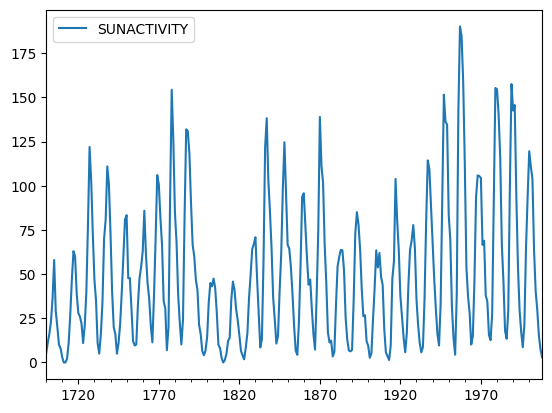

In [12]:
data.plot()

In [13]:
sm.stats.durbin_watson(data)

array([0.13952893])

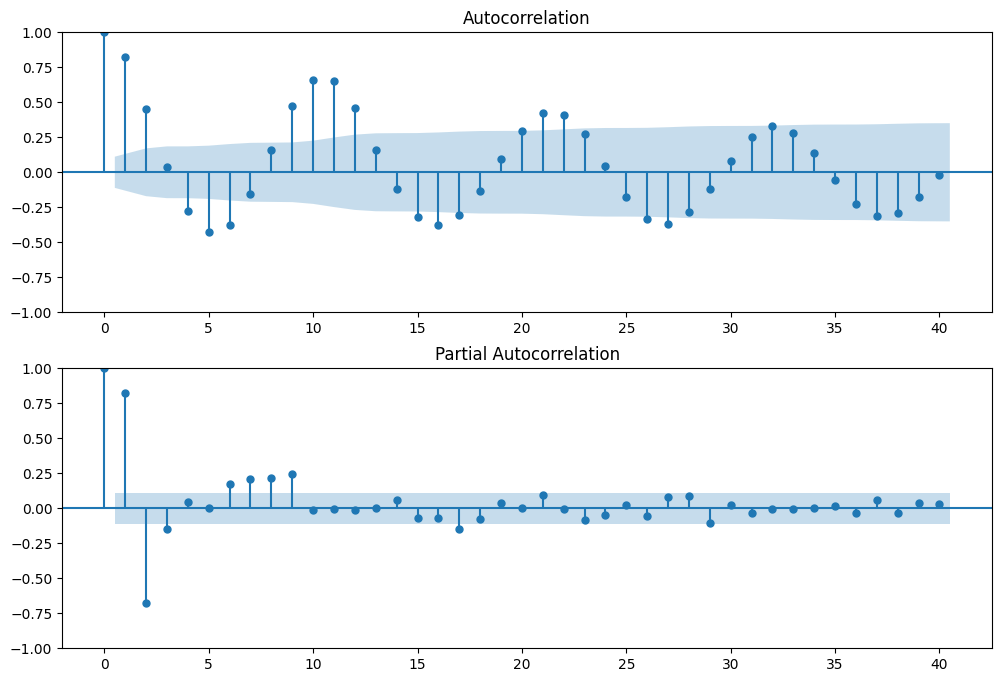

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

In [16]:
model = sm.tsa.statespace.SARIMAX(data, order=(2,0,0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1347.520
Date:                Sun, 15 Oct 2023   AIC                           2701.041
Time:                        19:39:39   BIC                           2712.241
Sample:                    12-31-1700   HQIC                          2705.519
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4809      0.037     39.534      0.000       1.407       1.554
ar.L2         -0.5933      0.046    -12.958      0.000      -0.683      -0.504
sigma2       355.9017     20.313     17.520      0.0

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


We now calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes (AIC, BIC, HQIC).

In [17]:
print(model.aic, model.bic, model.hqic)

2701.040923614845 2712.240947445538 2705.5187144987794


In [18]:
sm.stats.durbin_watson(model.resid.values)

1.8336473982572121

In [19]:
predict_sunspots20 = model.predict('1990', '2012', dynamic=False)
print(predict_sunspots20)

1990-12-31    173.944569
1991-12-31    117.675578
1992-12-31    131.165871
1993-12-31     53.207410
1994-12-31     24.910348
1995-12-31     11.885507
1996-12-31      8.176527
1997-12-31      2.353220
1998-12-31     26.737413
1999-12-31     82.467230
2000-12-31    100.020805
2001-12-31    121.763387
2002-12-31     93.423791
2003-12-31     88.159705
2004-12-31     32.631739
2005-12-31     22.036162
2006-12-31     20.162222
2007-12-31      4.829743
2008-12-31      2.088791
2009-12-31     -0.155056
2010-12-31     -1.950185
2011-12-31     -2.796072
2012-12-31     -2.983719
Freq: A-DEC, Name: predicted_mean, dtype: float64


(-20.0, 38.0, -4.0, 200.0)

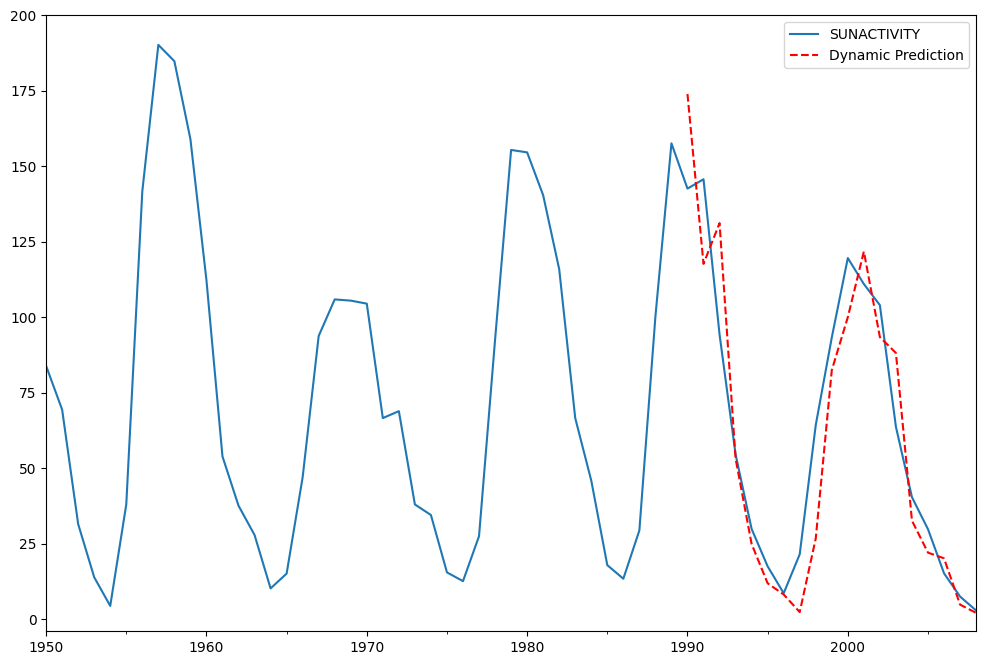

In [21]:
ax = data.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction')
ax.legend()
ax.axis((-20.0, 38.0, -4.0, 200.0))

In [24]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.abs(np.mean((np.abs(y.sub(yhat).mean()) / yhat))) # or percent error = * 100

In [25]:
print("MFE = ", mean_forecast_err(data.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(data.SUNACTIVITY, predict_sunspots20))

MFE =  2.5663148877978794
MAE =  0.6740969195557057
